In [59]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import itertools as iter

### 1.Quick knowledge

In [60]:
# short intro to iteration and list immutability
numbers = list(range(1, 11))

# this way elements are immutable
for number in numbers:
  number += 2
print(f"1.The numbers are immutable, the list is still the same - {numbers}")

# ugly solution
for number in numbers:
  numbers[number - 1] += 2
print(f"2.Get item by index and increment it by 2 (bad approach) - {numbers}")

# more clear solution but not perfect
for i in range(len(numbers)):
  numbers[i] += 2
print(f"3.Get item by index and increment it by 2 - {numbers}")

# THESE METHODS CHANGE THE ARRAY INTERNALY AND SOME TIMES WE DONT WANY THAT


1.The numbers are immutable, the list is still the same - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
2.Get item by index and increment it by 2 (bad approach) - [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
3.Get item by index and increment it by 2 - [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [61]:
# map function accepts function and iterable
base_arr = range(1, 11)
modified_arr = list(map(lambda n: n + 2, base_arr))
print(f"4.Iterate over collection and change the state of the values with 'map()': {modified_arr}")

modified_arr_filter = list(map(lambda n: n + 5 if n >= 5 else n, base_arr))
print(f"5.Lambda with filtering condition {modified_arr_filter}")

4.Iterate over collection and change the state of the values with 'map()': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
5.Lambda with filtering condition [1, 2, 3, 4, 10, 11, 12, 13, 14, 15]


In [62]:
# filter() as function, accept function and iterable
filtered_base_arr = list(filter(lambda n: n >= 5, base_arr))
print(f"6.Filtering array with 'filter()' func: {filtered_base_arr}")

6.Filtering array with 'filter()' func: [5, 6, 7, 8, 9, 10]


In [63]:
# list comprehension
list_comprehension = [n for n in base_arr]
print(f"7.List Comprehension, returns a copy of the iterated array/list(base_arr): {list_comprehension}")

# modification
list_comprehension = [n + 2 for n in base_arr]
print(f"7.1.List Comprehension, changing the state of the values, incrementing by 2: {list_comprehension}")

list_comprehension = [(n + 2) ** 2 for n in base_arr]
print(f"7.2.List Comprehension, changing the state of the values, incrementing by 2 to the power of 2: {list_comprehension}")

# filtering
list_comprehension = [(n + 2) ** 2 for n in base_arr if n <= 5]
print(f"7.3.List Comprehension, changing the state of the values, incrementing by 2 to the power of 2 with condition: {list_comprehension}")

7.List Comprehension, returns a copy of the iterated array/list(base_arr): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
7.1.List Comprehension, changing the state of the values, incrementing by 2: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
7.2.List Comprehension, changing the state of the values, incrementing by 2 to the power of 2: [9, 16, 25, 36, 49, 64, 81, 100, 121, 144]
7.3.List Comprehension, changing the state of the values, incrementing by 2 to the power of 2 with condition: [9, 16, 25, 36, 49]


In [64]:
# Nesting functions
def summator(a):
  def inner_summator(b): # this i called closure. Function that is encapsulated inside another function.
    return a + b
  return inner_summator

sum_result = summator(5)(5)
print(f"8.Calling Inner function and print the result: {sum_result}")

# the function part by part
add5 = summator(5)
add5_to1 = add5(1)
print(f"8.1.Add 5 to 1(function way): {add5_to1}")

# add 5 to all array items
add5_to_array_elements = [add5(n) for n in base_arr]
print(f"8.2.Add 5 to every array element: {add5_to_array_elements} !->List Comprehension returns a copy of the given array(base_arr)<-!")

8.Calling Inner function and print the result: 10
8.1.Add 5 to 1(function way): 6
8.2.Add 5 to every array element: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15] !->List Comprehension returns a copy of the given array(base_arr)<-!


In [65]:
# testing itertools.filterfalse()
test_arr = list(iter.filterfalse(lambda n: n % 2 != 0, range(10)))
print(test_arr)

[0, 2, 4, 6, 8]


In [66]:
# numpy power
np_arr = np.arange(1, 21)
print(f"9.NumPy Array, adding 5 to each element and mult. by 2 directly: {(np_arr + 5) * 2}")

# can be filtered
np_nums = np_arr
filter_larger_than_5 = np_nums[np_nums > 5]
print(f"9.1.Filtering NumPy arr: {filter_larger_than_5}")

9.NumPy Array, adding 5 to each element and mult. by 2 directly: [12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50]
9.1.Filtering NumPy arr: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [67]:
# NumPy array "tricks"
tuple_arr = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
print(f"10.Take tuple by index: {tuple_arr[1]}")
print("10.1.Take all tuples: " + " ".join(map(str, tuple_arr)))
print(f"10.2.Take the first element of the tuple: {tuple_arr[:, 0]}")
print(f"10.3.Take the second element of the tuple: {tuple_arr[:, 1]}")
print(f"10.4.Take from 1 to 3(exluding) element the tuples second element: {tuple_arr[1:3, 1]}")

10.Take tuple by index: [1.  0.8]
10.1.Take all tuples: [0. 0.] [1.  0.8] [2.  0.9] [3.  0.1] [ 4.  -0.8] [ 5. -1.]
10.2.Take the first element of the tuple: [0. 1. 2. 3. 4. 5.]
10.3.Take the second element of the tuple: [ 0.   0.8  0.9  0.1 -0.8 -1. ]
10.4.Take from 1 to 3(exluding) element the tuples second element: [0.8 0.9]


#### 2.Polynomial Interpolation

In [68]:
#coordinate points
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
# in n-points we can pass Polynomial of n^-1 ===> n -> n^-1
print(f"11.The length of the points is 6 {len(points)} so we can provide a polynomial to the power of 5 because one of the number is constant (or ax^0)")

# separate the points by x and y
x = points[:, 0]
y = points[:, 1]
polynomial_func = Polynomial.fit(x, y, len(points) - 1)
print(f"11.1.Plolynomial of given points: {polynomial_func}") # len(points) - 1 is degree of the function

print(f"11.2.Calling the polynomial function in point 0 to 5: {polynomial_func(3)}")

11.The length of the points is 6 6 so we can provide a polynomial to the power of 5 because one of the number is constant (or ax^0)
11.1.Plolynomial of given points: 0.57421875 - 2.09505208 x - 1.88802083 x**2 + 2.40885417 x**3 +
0.81380208 x**4 - 0.81380208 x**5
11.2.Calling the polynomial function in point 0 to 5: 0.10000000000000042


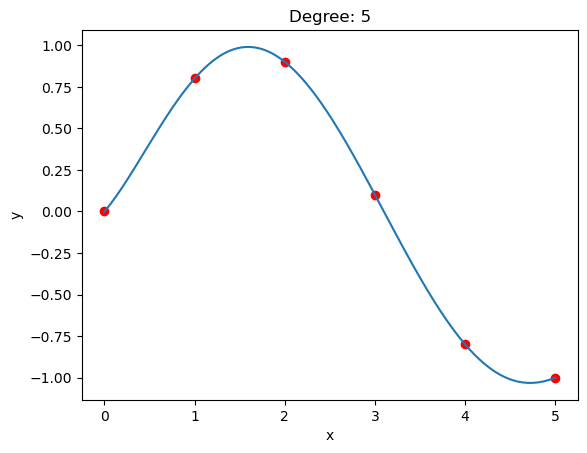

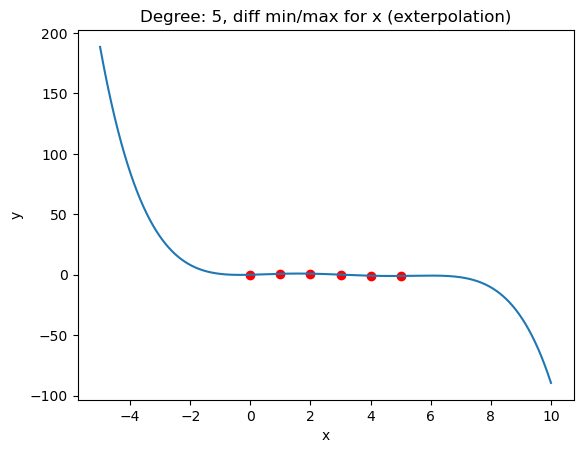

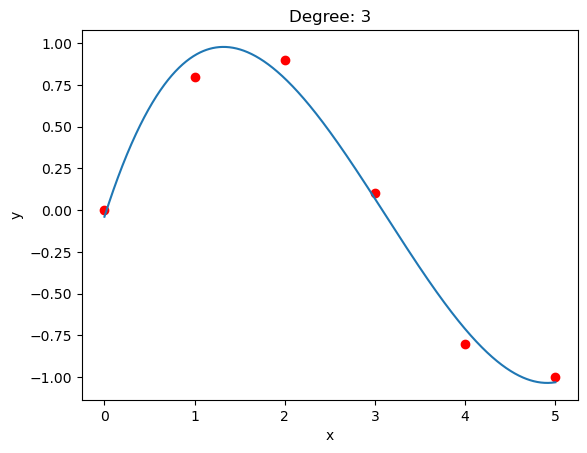

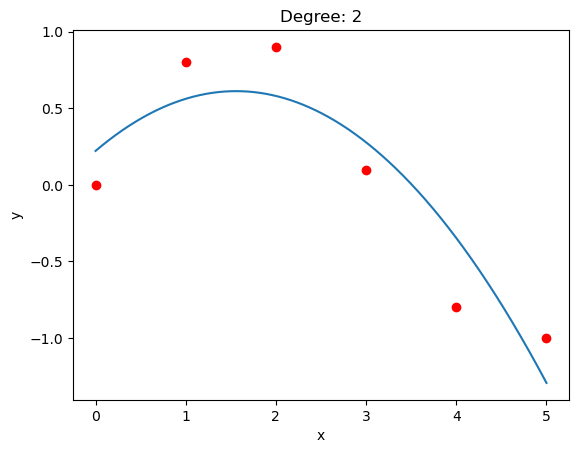

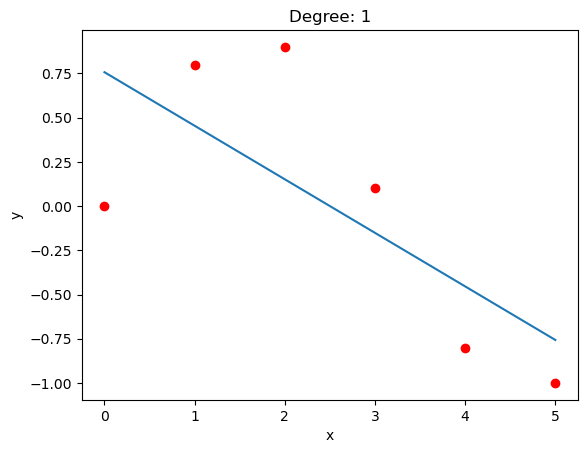

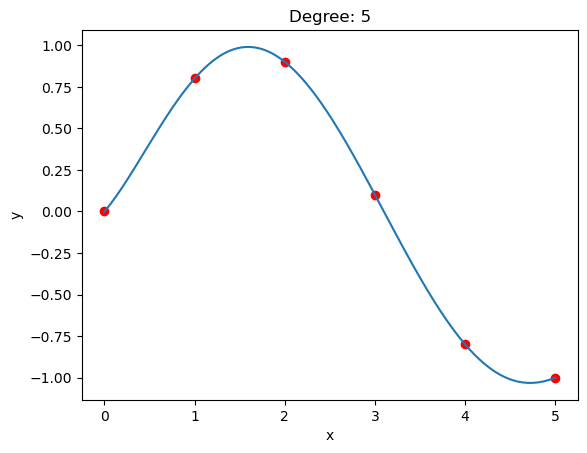

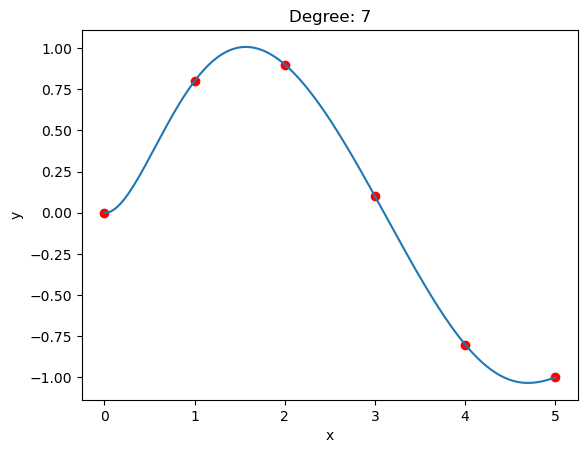

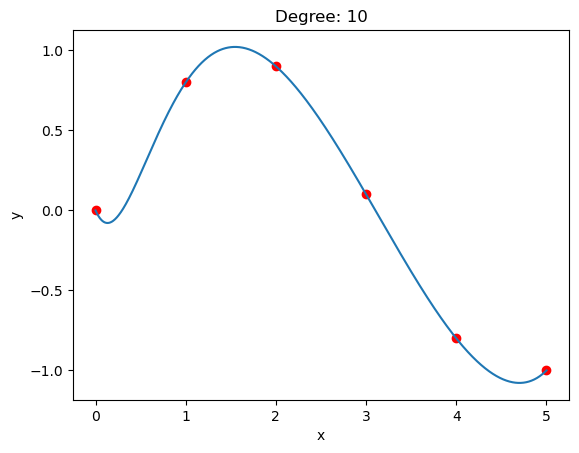

In [69]:
# all the code above is summed in this function with plotting
def interpolate_polynomial(points, degree, min_x, max_x, str=""):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """
    x = points[:, 0]
    y = points[:, 1]
    polynomial_func = Polynomial.fit(x, y, degree)
    
    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = polynomial_func(plot_x)
    
    plt.plot(plot_x, plot_y)
    plt.scatter(x, y, c = "r")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(str)
    
    # plt.gca().set_aspect("equal")
    plt.show()
    
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 5")

# the interval is squished and parabola outside the given points is called polynomial exterpolation
interpolate_polynomial(points, len(points) - 1, -5, 10, "Degree: 5, diff min/max for x (exterpolation)")

# tests with differen degree(exponents) of the polynomial func (interpolation)
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 3")
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 2")
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 1")
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 5")
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 7")
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]), "Degree: 10")

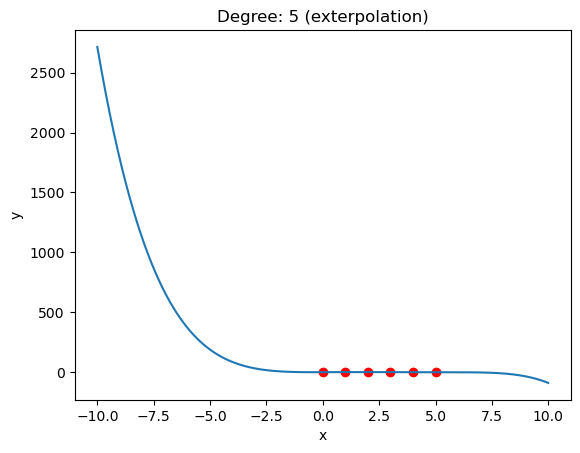

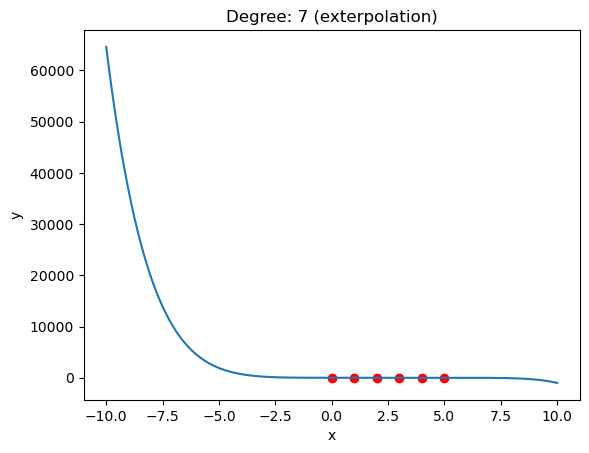

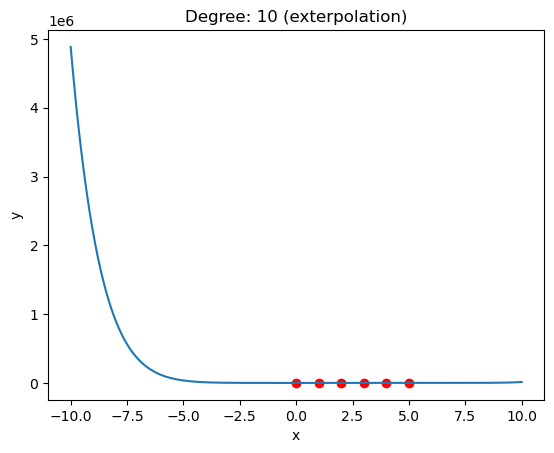

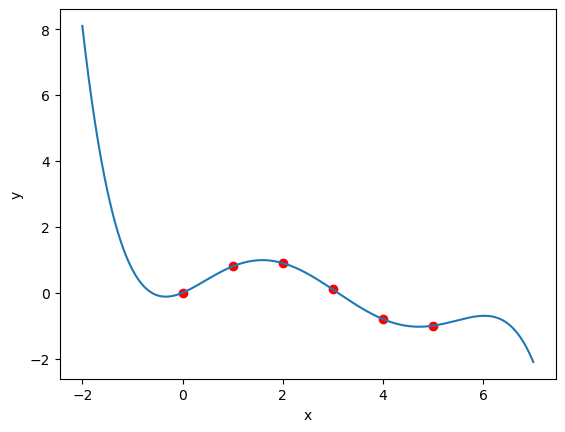

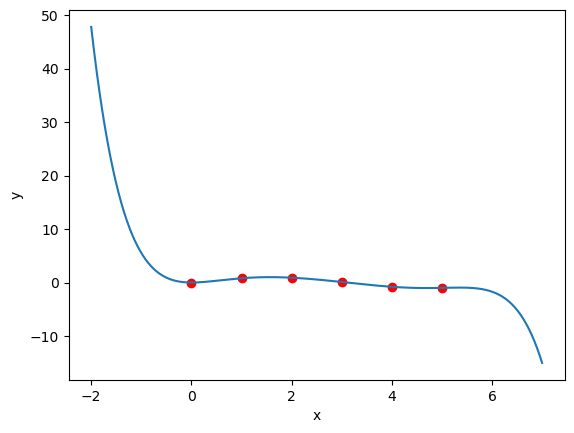

In [70]:
# Polynomial exterpolation
interpolate_polynomial(points, 5, -10, 10, "Degree: 5 (exterpolation)")
interpolate_polynomial(points, 7, -10, 10, "Degree: 7 (exterpolation)")
interpolate_polynomial(points, 10, -10, 10, "Degree: 10 (exterpolation)")
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

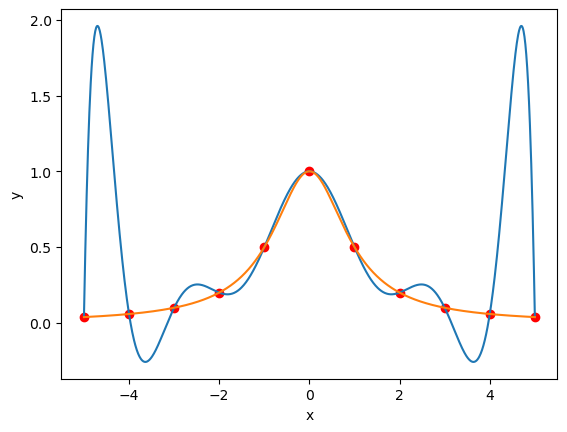

In [81]:
def interpolate_polynomial(points, degree, min_x, max_x, str=""):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """
    x = points[:, 0]
    y = points[:, 1]
    polynomial_func = Polynomial.fit(x, y, degree)
    
    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = polynomial_func(plot_x)
    plot_z = 1 / (1 + plot_x**2) # the real function is this, not a polynomial
    
    plt.plot(plot_x, plot_y)
    plt.plot(plot_x, plot_z)
    plt.scatter(x, y, c = "r")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(str)
    
    # plt.gca().set_aspect("equal")
    plt.show()
    
points2 = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points2, len(points2) - 1, np.min(points2[:, 0]), np.max(points2[:, 0]))


#### 3.Complex Numbers as Vectors

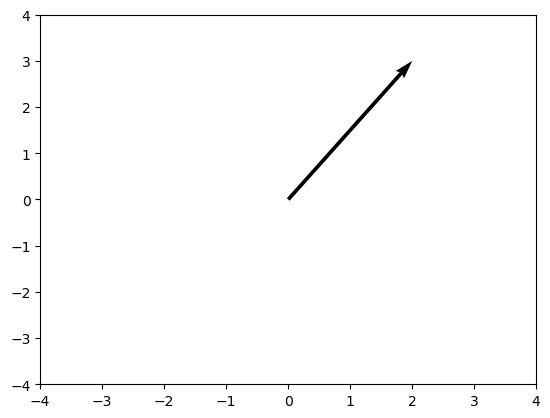

In [72]:
# plotting single vector
def plot_complex_number(z):
    """
    Plots the complex number z as a radius vector in the 2D space
    """
    plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
    plt.xticks(range(-4, 5))
    plt.yticks(range(-4, 5))

plot_complex_number(2 + 3j)

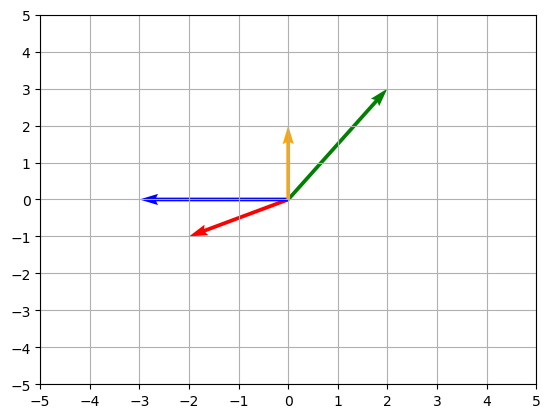

In [73]:
# plotting several vectors
def plot_complex_numbers(numbers, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    plt.quiver([0] * len(numbers), [0] * len(numbers), [z.real for z in numbers], [z.imag for z in numbers], angles = "xy", scale_units = "xy", scale = 1, color = colors)
    plt.xticks(range(-5, 6))
    plt.yticks(range(-5, 6))
    plt.grid()
    
plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

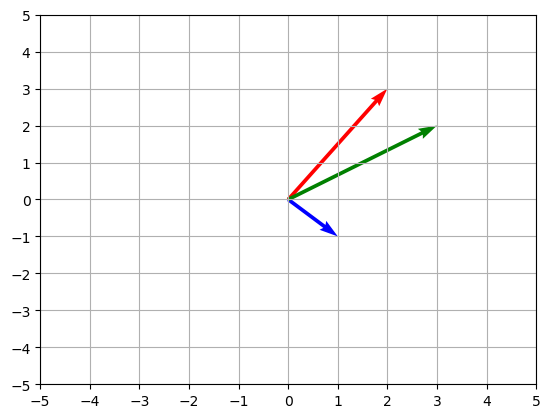

In [74]:
# sum of two vectors
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

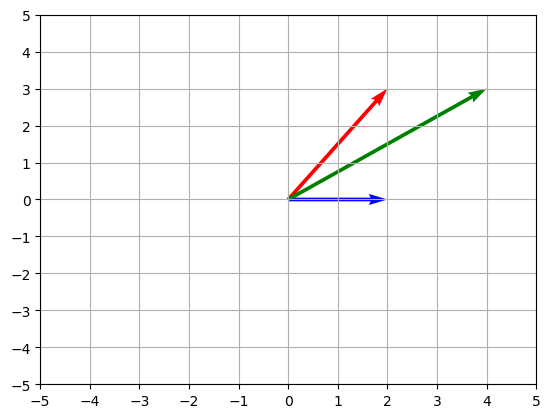

In [75]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

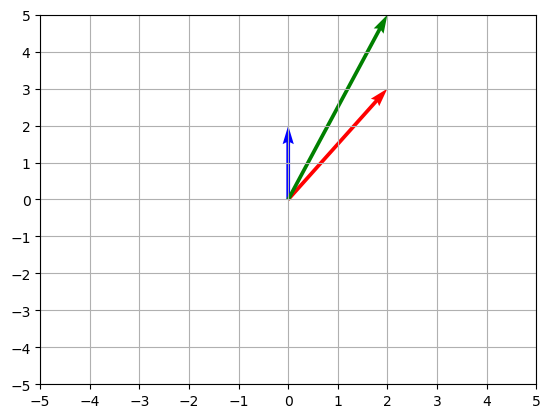

In [76]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])